In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
url = 'D:/Netflix Data Analysis/netflix_titles.csv'  # Replace with the path to your dataset
df = pd.read_csv(url)

In [6]:
# Step 3: Initial Data Exploration
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 2

In [7]:
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
liste

In [8]:
# Step 4: Data Cleaning
# Fill missing values in categorical columns
categorical_cols = ['director', 'cast', 'country']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

In [9]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
# Fill missing 'rating' and 'date_added'
df['rating'].fillna('Unknown', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)

In [11]:
# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

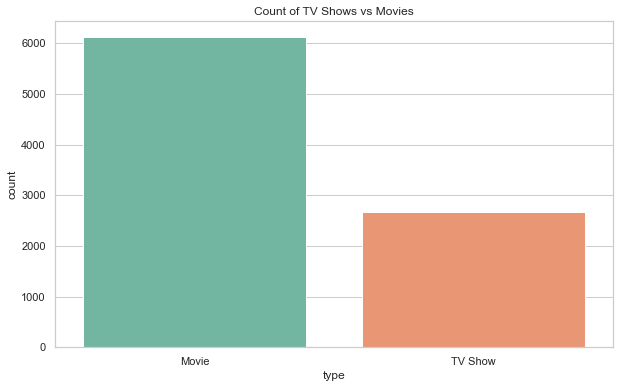

In [12]:
# Step 5: Univariate Analysis
# Count of TV Shows vs Movies
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of TV Shows vs Movies')
plt.show()

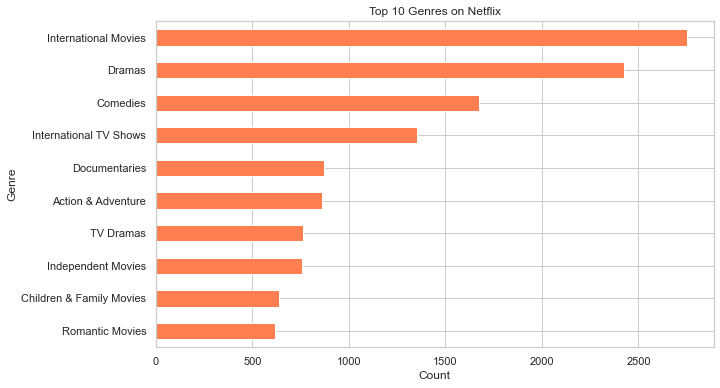

In [13]:
# Top 10 Genres
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres.plot(kind='barh', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

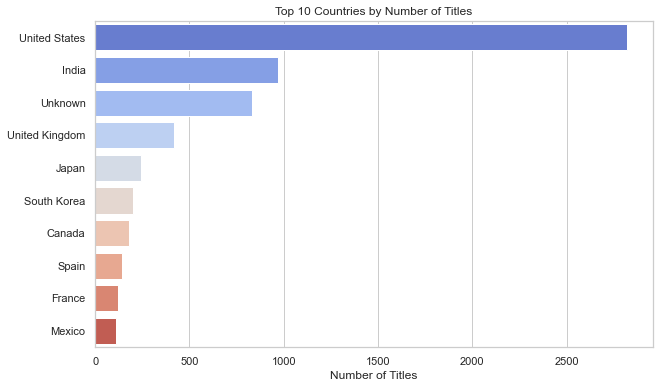

In [14]:
# Step 6: Content by Country
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()

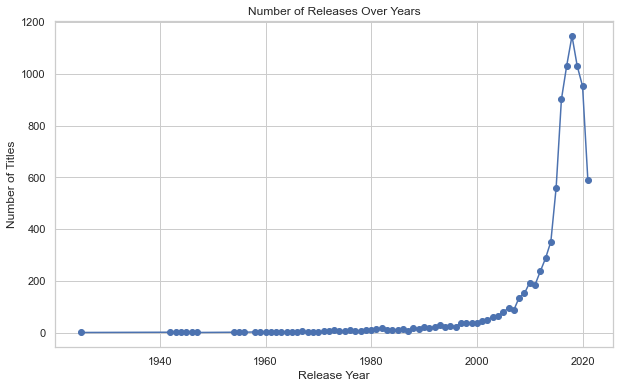

In [15]:
# Step 7: Time Series Analysis
yearly_releases = df['release_year'].value_counts().sort_index()
yearly_releases.plot(kind='line', marker='o')
plt.title('Number of Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

C:\Users\SHUBHAM SINHA\AppData\Local\Temp\ipykernel_3380\1205179306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)


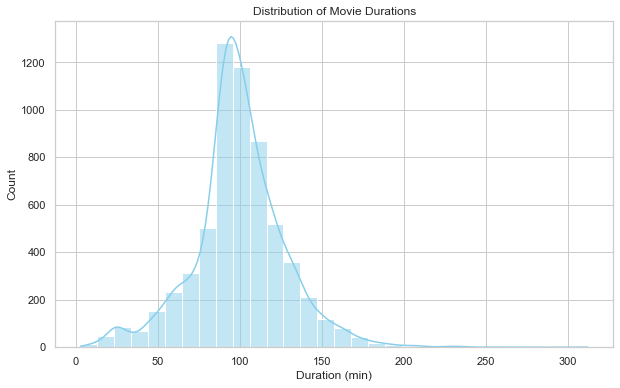

In [16]:
# Step 8: Duration Analysis (Movies Only)
movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)
sns.histplot(movies_df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

In [17]:
# Step 9: Key Insights
print("\nKey Insights:")
print("- Netflix has more Movies than TV Shows.")
print("- Drama and International content dominate the platform.")
print("- The United States contributes the most content.")
print("- Content production has increased significantly post-2015.")
print("- Most movies have a duration between 80-120 minutes.")


Key Insights:
- Netflix has more Movies than TV Shows.
- Drama and International content dominate the platform.
- The United States contributes the most content.
- Content production has increased significantly post-2015.
- Most movies have a duration between 80-120 minutes.
